In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [ ]:
data = []
labels = []
classes = 10
cur_path = 'D:\\Sign-Language-Digits-Dataset-master'


In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'Dataset',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image1 = Image.open(path + '\\'+ a)
            image = image1.convert(mode="L")
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [ ]:
plt.imshow(data[711])

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [ ]:
timages = data.reshape(2062, 30, 30, 1)

In [146]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(timages, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [142]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(30,30,1)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.35))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))


In [143]:

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
52/52 [==============================] - 11s 208ms/step - loss: 3.2639 - accuracy: 0.0952 - val_loss: 2.2977 - val_accuracy: 0.1283
Epoch 2/10
52/52 [==============================] - 10s 200ms/step - loss: 2.2996 - accuracy: 0.1237 - val_loss: 2.2881 - val_accuracy: 0.1743
Epoch 3/10
52/52 [==============================] - 11s 203ms/step - loss: 2.2539 - accuracy: 0.1607 - val_loss: 2.0745 - val_accuracy: 0.3293
Epoch 4/10
52/52 [==============================] - 10s 198ms/step - loss: 1.8708 - accuracy: 0.3129 - val_loss: 1.3791 - val_accuracy: 0.5109
Epoch 5/10
52/52 [==============================] - 10s 200ms/step - loss: 1.4439 - accuracy: 0.4718 - val_loss: 1.0766 - val_accuracy: 0.6610
Epoch 6/10
52/52 [==============================] - 10s 197ms/step - loss: 1.0205 - accuracy: 0.6434 - val_loss: 0.8286 - val_accuracy: 0.7458
Epoch 7/10
52/52 [==============================] - 11s 204ms/step - loss: 0.8634 - accuracy: 0.6980 - val_loss: 0.7192 - val_accuracy: 0.7676

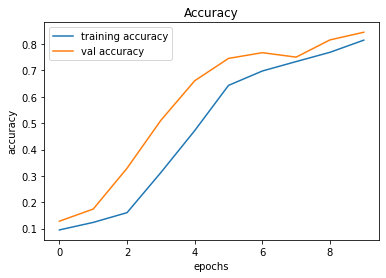

In [144]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

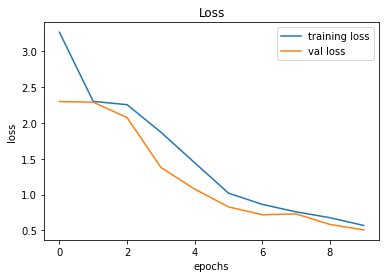

In [145]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [174]:
path = 'D:\Sign-Language-Digits-Dataset-master\Examples'
labels = [0,1,2,3,4,5,6,7,8,9]
images = os.listdir(path)
tesdata=[]


In [175]:
for a in images:
    try:
        image1 = Image.open(path + '\\'+ a)
        image = image1.convert(mode="L")
        image = image.resize((30,30))
        image = np.array(image)
        tesdata.append(image)
    except:
        print("Error loading image")

In [183]:
tesdata = np.array(tesdata)
tesimages = tesdata.reshape(10, 30, 30, 1)
pred = model.predict_classes(tesimages)

In [184]:
for i in range(0,10):
    print(pred[i])

0
1
2
3
6
5
6
7
8
9


In [185]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9
